In [1]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None)

from sklearn import preprocessing
import matplotlib

matplotlib.style.use('ggplot')

from sklearn.preprocessing import LabelEncoder

In [2]:
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.express as px

In [3]:
df = pd.read_csv("heart.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
string_col = df.select_dtypes(include="object").columns
df[string_col] = df[string_col].astype("string")

In [8]:
string_col = df.select_dtypes("string").columns.to_list()

In [9]:
num_col = df.select_dtypes(np.number).columns.to_list()
num_col.remove("HeartDisease")
num_col

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [100]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [98]:
df.corr()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

In [11]:
import plotly.express as px

# Create the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
heatmap = px.imshow(corr_matrix,
                    title="Correlation Plot of the Heart Failure Prediction",
                    color_continuous_scale="RdBu",
                    zmin=-1,
                    zmax=1)

# Add annotations to the heatmap
heatmap.update_traces(text=corr_matrix.values.round(2),
                      hovertemplate="Variable A: %{x}<br>Variable B: %{y}<br>Correlation: %{text}<extra></extra>",
                      colorbar_len=0.5)

# Customize the layout
heatmap.update_layout(
    xaxis=dict(tickfont=dict(size=10)),
    yaxis=dict(tickfont=dict(size=10)),
    autosize=True,
    margin=dict(l=50, r=50, t=100, b=50),
    coloraxis=dict(
        colorbar=dict(
            title="Correlation",
            titleside="right",
            thickness=15,
            lenmode="fraction",
            len=0.8,
            yanchor="middle",
            y=0.5,
            ticks="inside",
            ticklen=10,
            tickcolor="white",
            tickfont=dict(size=10),
        )
    ),
    annotations=[
        dict(
            x=i,
            y=j,
            text=str(corr_matrix.values[i, j].round(2)),
            showarrow=False,
            font=dict(color="black", size=10),
        )
        for i in range(len(corr_matrix.columns))
        for j in range(len(corr_matrix.columns))
    ],
)

# Show the heatmap
heatmap.show()


In [12]:
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px

# Create the subplots
fig = sp.make_subplots(rows=1, cols=3)

# Define the data and settings for each histogram
histogram1 = px.histogram(df, x="HeartDisease", color="Sex", title="Distribution of Heart Diseases", barmode="group")
histogram2 = px.histogram(df, x="ChestPainType", color="Sex", hover_data=df.columns, title="Types of Chest Pain")
histogram3 = px.histogram(df, x="RestingECG", color="Sex", hover_data=df.columns, title="Distribution of Resting ECG")

# Add each histogram to the subplots
fig.add_trace(go.Histogram(histogram1.data[0]), row=1, col=1)
fig.add_trace(go.Histogram(histogram2.data[0]), row=1, col=2)
fig.add_trace(go.Histogram(histogram3.data[0]), row=1, col=3)

# Update the layout of the subplots
fig.update_layout(title="Histograms of Heart Diseases, Chest Pain Types, and Resting ECG",
                  showlegend=False)

# Show the figure
fig.show()


[]

<Figure size 1500x1000 with 0 Axes>

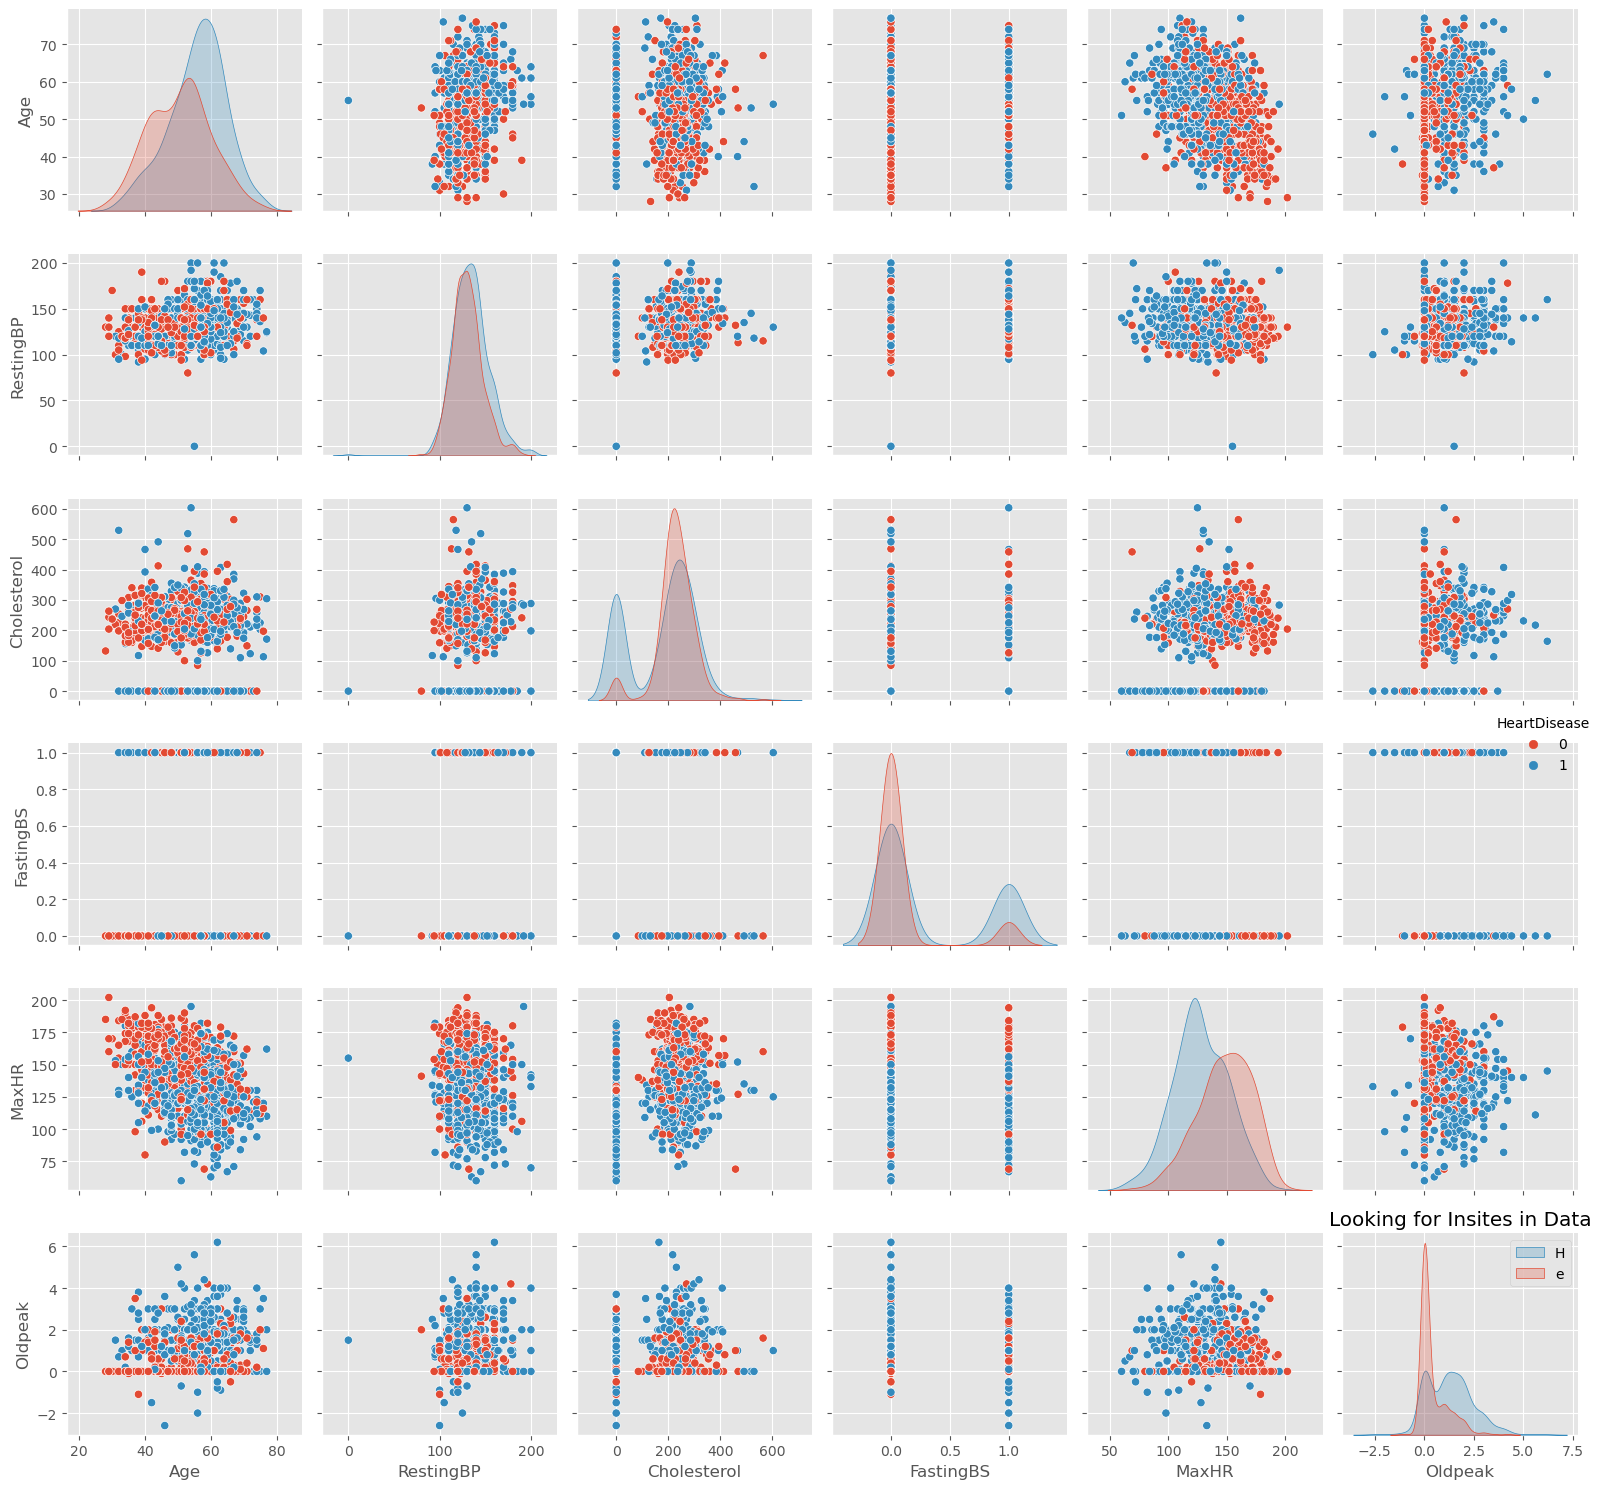

In [13]:
plt.figure(figsize=(15, 10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

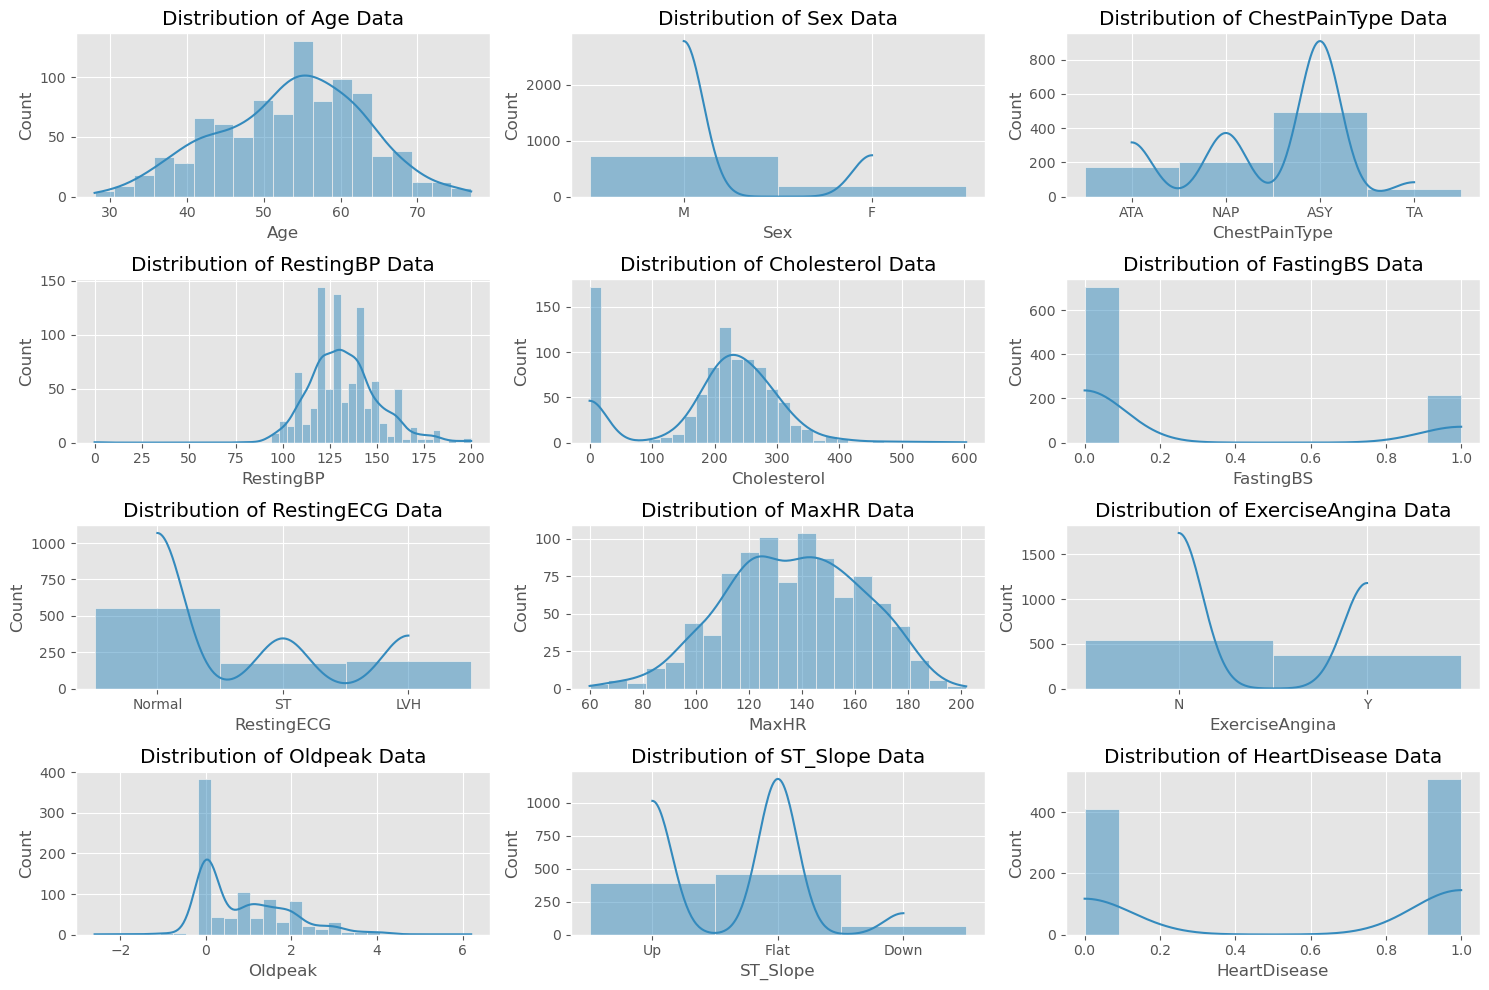

In [14]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.plot()

In [15]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distribution of Age")
fig.show()

In [16]:
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px

# Create the subplots
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=("Age", "RestingBP", "Cholesterol", "Oldpeak"))

# Define the data and settings for each box plot
box1 = px.box(df, y="Age", x="HeartDisease", title="Distribution of Age")
box2 = px.box(df, y="RestingBP", x="HeartDisease", title="Distribution of RestingBP", color="Sex")
box3 = px.box(df, y="Cholesterol", x="HeartDisease", title="Distribution of Cholesterol")
box4 = px.box(df, y="Oldpeak", x="HeartDisease", title="Distribution of Oldpeak")

# Add each box plot to the subplots
fig.add_trace(go.Box(box1.data[0]), row=1, col=1)
fig.add_trace(go.Box(box2.data[0]), row=1, col=2)
fig.add_trace(go.Box(box3.data[0]), row=2, col=1)
fig.add_trace(go.Box(box4.data[0]), row=2, col=2)

# Update the layout of the subplots
fig.update_layout(height=800, width=1000, title_text="Box Plots of Heart Disease Attributes")

# Show the figure
fig.show()


In [17]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title="Distribution of RestingBP",color="Sex")
fig.show()

In [18]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title="Distribution of Cholestrol")
fig.show()

In [19]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title="Distribution of Oldpeak")
fig.show()

In [20]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title="Distribution of MaxHR")
fig.show()

In [21]:
# Label encoding for tree-based models
df_tree = df.apply(LabelEncoder().fit_transform)
X_tree = df_tree.drop("HeartDisease", axis=1)
y_tree = df_tree["HeartDisease"]

In [40]:
# One-hot encoding for non-tree-based models
string_cols = df.select_dtypes('string').columns.to_list()
df_nontree = pd.get_dummies(df, columns = string_cols, drop_first=False)
X_nontree = df_nontree.drop("HeartDisease", axis=1)
y_nontree = df_nontree["HeartDisease"]

In [90]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score

def cross_validation_test(X, y, learner, learner_name, n=5):
    kf = StratifiedKFold(n_splits=n)
    report = []
    scores = []
        
    for fold, (trn_, val_) in enumerate(kf.split(X=X, y=y)):
        X_train = X.iloc[trn_]
        y_train = y.iloc[trn_]
        X_valid = X.iloc[val_]
        y_valid = y.iloc[val_]
        
        pipe = make_pipeline(MinMaxScaler(), learner)
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_valid)
        acc = roc_auc_score(y_valid, y_pred)
        
#         print("=" * (53))
#         print(f"The fold is : {fold+1} : ")
#         print("=" * (53))
#         print(classification_report(y_valid, y_pred))
        
#         acc = roc_auc_score(y_valid, y_pred)
#         print(f"The accuracy for {fold+1} : {acc} \n")
        
        report.append(classification_report(y_valid, y_pred, output_dict=True))
        scores.append(acc)
    
    return report, scores

In [91]:
def plot_performance(models, reports, scores):
    fig, axes = plt.subplots(len(models), 2, figsize=(12, len(models) * 4))
    metrics = ['precision', 'recall', 'f1-score', 'support']
    
    for i, model in enumerate(models):
        data = []
        
        for fold in range(len(reports[i])):
            class_report = reports[i][fold]['0']
            class_data = [class_report[metric] for metric in metrics]
            data.append(class_data)
        
        df = pd.DataFrame(data, columns=metrics)
        
        ax1 = axes[i, 0]
        sns.heatmap(df, annot=True, cmap="Blues", ax=ax1, cbar=False)
        ax1.set_title(f"Classification Report - {model}")
        ax1.set_xlabel("Metrics")
        ax1.set_ylabel("Classes")
        
        # Plot ROC AUC scores
        ax2 = axes[i, 1]
        ax2.bar(range(len(scores[i])), scores[i])
        ax2.set_title(f"ROC AUC Scores - {model}")
        ax2.set_xlabel("Fold")
        ax2.set_ylabel("ROC AUC Score")
        ax2.set_ylim([0, 1])

    plt.tight_layout()
    plt.show()


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

nontree_model = {
    'Logistic Regression' : LogisticRegression(),
    'Gaussian Naive Bayes' : GaussianNB(),
    'Linear SVC' : SVC(kernel = 'linear'),
    'Sigmoid SVC' : SVC(kernel = 'sigmoid'),
    'RBF SVC' : SVC(kernel = 'rbf'),
    'Polynomial SVC' : SVC(kernel = 'poly'),
    'KNN Classifier' : KNeighborsClassifier(n_neighbors=32)
}

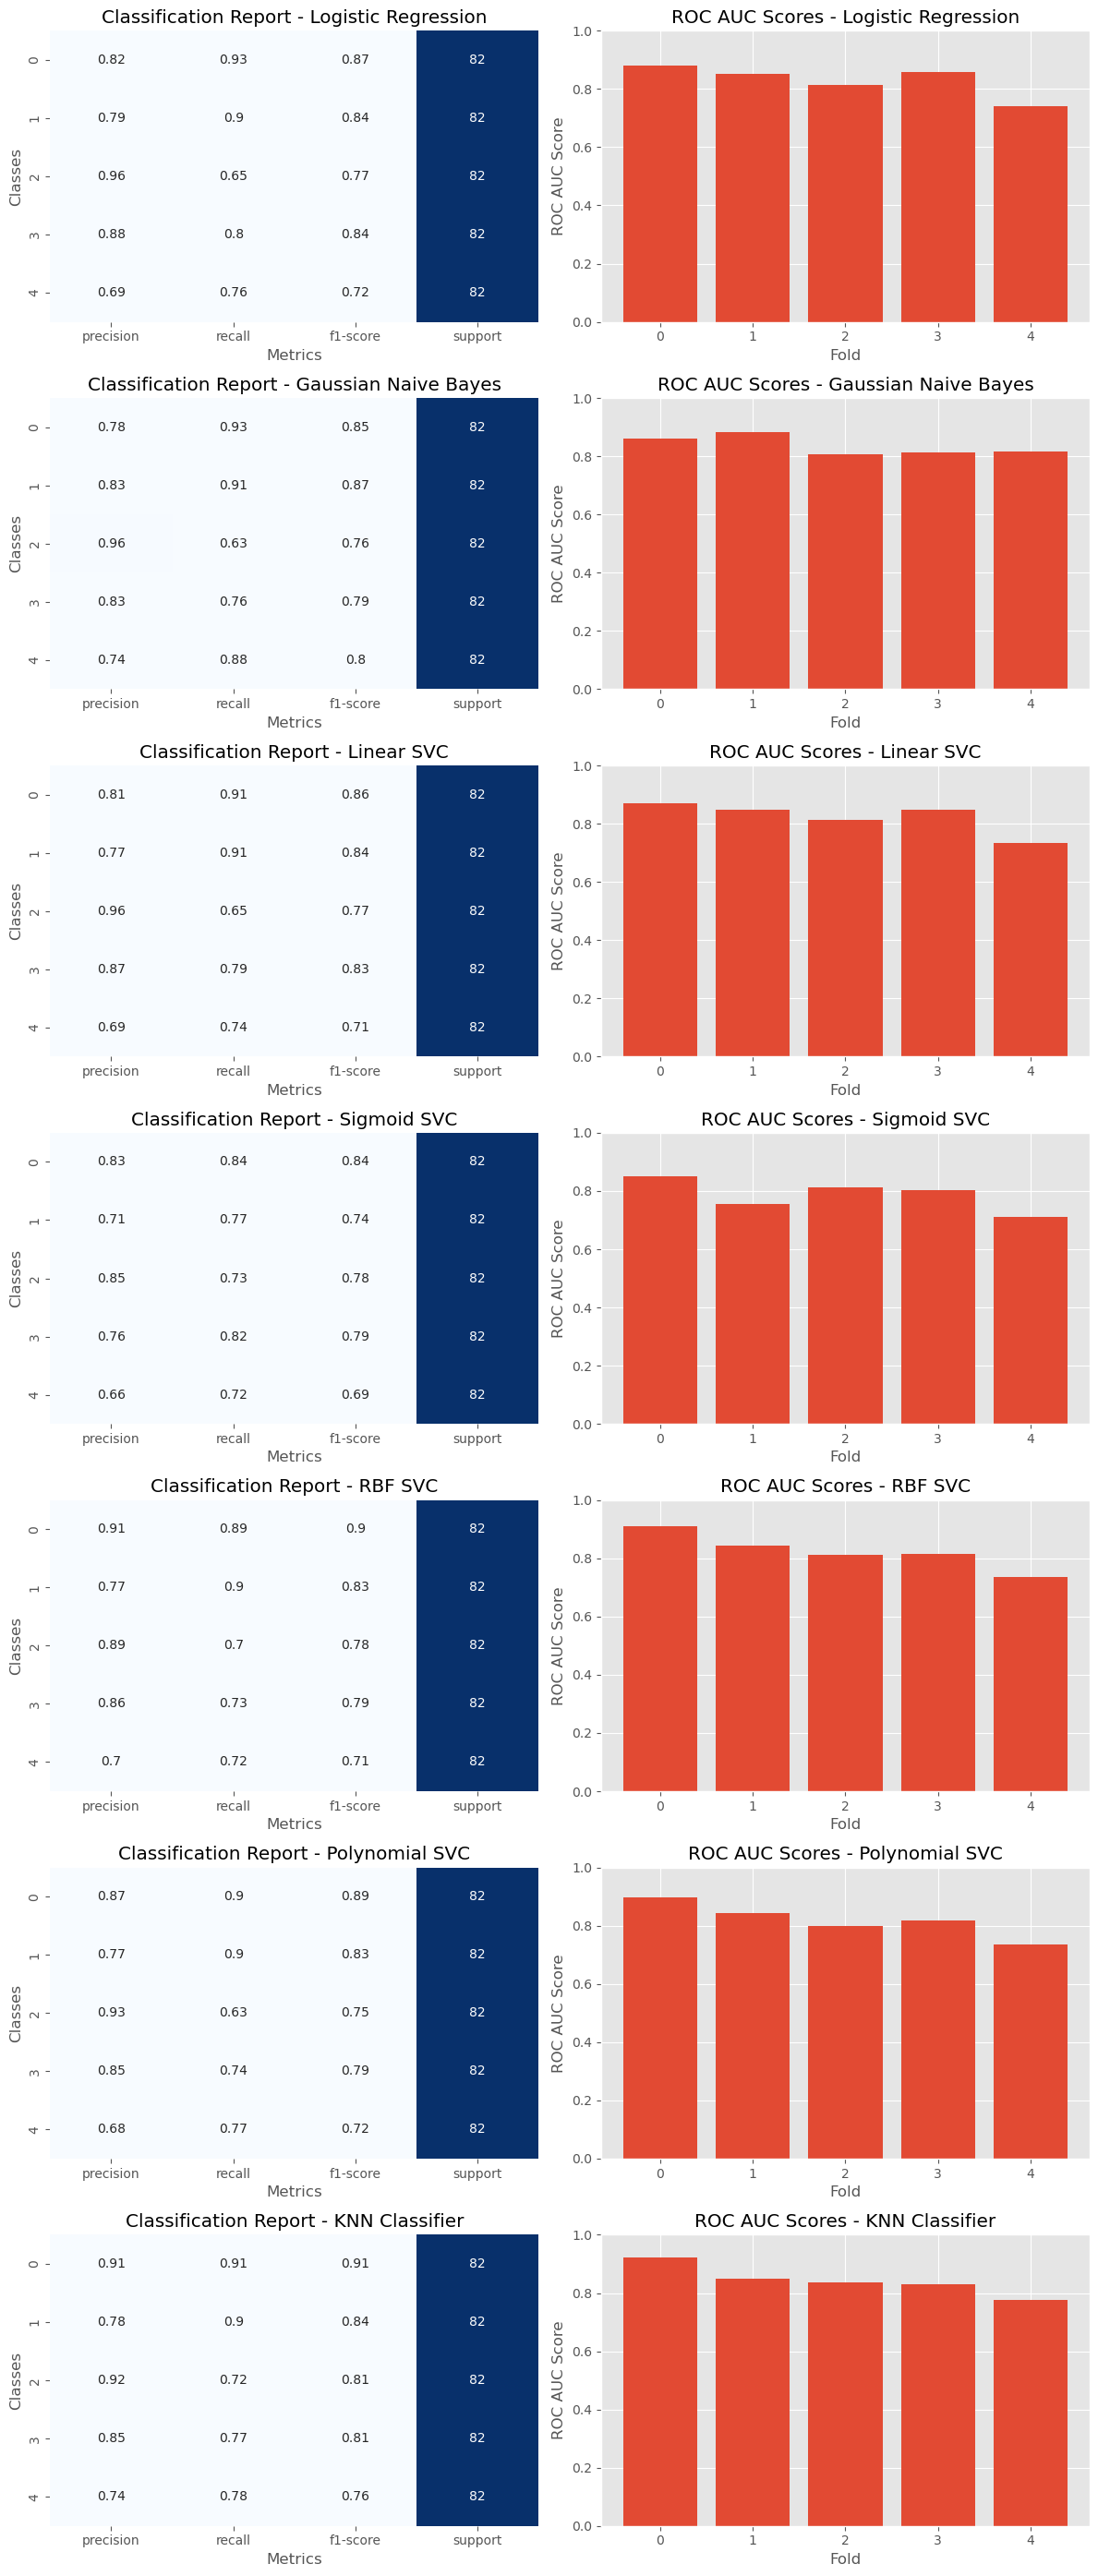

In [93]:
models = list(nontree_model.keys())
reports, scores = [], []

for key in nontree_model:
    report, score = cross_validation_test(X_nontree, y_nontree, nontree_model[key], key)
    reports.append(report)
    scores.append(score)

plot_performance(models, reports, scores)

In [94]:
tree_model = {
    'DecisionTree Classifier' : DecisionTreeClassifier(criterion="entropy"),
    'RandomForest Classfier' : RandomForestClassifier(n_estimators=200, criterion="entropy"),
    'XGBClassifier' : XGBClassifier()
}

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:

cross_validation_test(X_nontree_set, y_nontree_set, LogisticRegression(), "Logistic Regression")

In [ ]:

cross_validation_test(X_nontree_set, y_nontree_set, GaussianNB(), "Gaussian Naive Bayes")

In [ ]:

cross_validation_test(X_nontree_set, y_nontree_set, SVC(kernel="linear"), "Linear SVM")

In [ ]:
from sklearn.svm import SVC
cross_validation_test(X_nontree_set, y_nontree_set, SVC(kernel="sigmoid"), "Sigmoid SVM")

In [ ]:
from sklearn.svm import SVC
cross_validation_test(X_nontree_set, y_nontree_set, SVC(kernel="rbf"), "RBF SVM")

In [ ]:
cross_validation_test(X_nontree_set, y_nontree_set, SVC(kernel="poly"), "Polynomial SVM")

In [ ]:

cross_validation_test(X_nontree_set, y_nontree_set, KNeighborsClassifier(n_neighbors=32), "KNN with 32 neighbors")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
cross_validation_test(X_tree, y_tree, DecisionTreeClassifier(criterion="entropy"), "Decision Tree Classifier")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
cross_validation_test(X_tree, y_tree, RandomForestClassifier(n_estimators=200, criterion="entropy"), "Random Forest Classifier")

In [ ]:
from xgboost import XGBClassifier
cross_validation_test(X_tree, y_tree, XGBClassifier(), "XGBClassifier")